In [ ]:
#!pip install tweepy

import numpy as np
import pandas as pd


In [ ]:
sexist1 = pd.read_excel('../Dataset/sexism/ISEP Sexist Data labeling.xlsx')

In [ ]:
sexist1.describe()

,Label
count,1137.000000
mean,0.548813
std,0.497831
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [ ]:
sexist1.head()

,Sentences,Label
0,"For a woman, that is good",1
1,Just dress sexy and you will sign any contract.,1
2,Are you having period ?,1
3,Stop being bitchy,1
4,I leave early because of her children instead ...,1


In [ ]:
print(sexist1.columns)

Index(['Sentences', 'Label'], dtype='object')


In [ ]:
sexist1.Label[sexist1.Label!=1].count()
sexist1 = sexist1[sexist1.Label==1]

In [ ]:
sexist1.describe()

,Label
count,624.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [ ]:
sexist2 = pd.read_csv('../Dataset/sexism/NLP_CSS_2017-master/benevolent_sexist.tsv',sep='\t')
sexist3 = pd.read_csv('../Dataset/sexism/NLP_CSS_2017-master/hostile_sexist.tsv',sep='\t')

In [ ]:
sexist2.head()

,Sentences
0,839880162586071040
1,839630746625142784
2,839630739335495681
3,839665182985097216
4,839765815494795264


In [ ]:
sexist2.describe()

,Sentences
count,7.205000e+03
mean,8.402566e+17
std,2.242018e+15
min,8.364605e+17
25%,8.396102e+17
50%,8.396636e+17
75%,8.398747e+17
max,8.476735e+17


In [ ]:
sexistSentences = pd.DataFrame(sexist1['Sentences'])

In [ ]:
sexist3.head()

,Sentences
0,572346080911736832
1,572348198062170112
2,572348106202750976
3,572319306387599360
4,572347842456522752


In [ ]:
sexist = pd.concat([sexistSentences,sexist2,sexist3],axis=0)

In [ ]:
sexist.describe()

,Sentences
count,11207
unique,11199
top,Time to get up and walk like a man
freq,2


In [ ]:
sexist[sexist.Sentences.duplicated()]


,Sentences
476,Time to get up and walk like a man
479,"As a man, I would have worded that sentence tw..."
488,I don't care how hard you think you are if you...
593,she is blond what do you want
622,"i'm no sexist, i'm a realist"
632,It isn't sexist if you're right.
724,If you want to be intelligent hang out with men.
763,I believe men and women have their roles in th...


In [ ]:
sexist.drop_duplicates(inplace=True)

In [ ]:
sexist.count()[0]

11199

# Racism Dataset

In [ ]:
racist1 = pd.read_csv('../Dataset/racism/Charlottesville_08122017.txt',sep='\t',names=['Sentence'])
racist2 = pd.read_csv('../Dataset/racism/twets/2017_Tweets_Grenfell Public Inquiry began.txt',sep='\t',names=['Sentence'])
racist3 = pd.read_csv('../Dataset/racism/twets/2018_Tweets_Petition.txt',sep='\t',names=['Sentence'])
racist4 = pd.read_csv('../Dataset/racism/twets/2019_Tweets_Inquiry Report.txt',sep='\t',names=['Sentence'])                      
racist5 = pd.read_csv('../Dataset/racism/twets/2020_Tweets_COVID cancelled SW.txt',sep='\t',names=['Sentence'])                 

In [ ]:
print(racist4.count())
racist2.head()

Sentence    47
dtype: int64


,Sentence
0,911301472142479360
1,911197397556056064
2,911197297840721920
3,911121183445327872
4,910950274763755520


In [ ]:
racist = pd.concat([racist1.loc[:10000], racist2,racist3,racist4,racist5],axis=0)

In [ ]:
racist.describe()

,Sentence
count,1.026800e+04
mean,8.994136e+17
std,2.600972e+16
min,8.963186e+17
25%,8.963213e+17
50%,8.963240e+17
75%,8.963264e+17
max,1.241669e+18


In [ ]:
racist.Sentence.duplicated().sum()

0

# General Hatespeech

In [ ]:
general1 = pd.read_csv('../Dataset/general/labeled_data.csv')

In [ ]:
general1.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
general1 = general1[['class','tweet']]

In [ ]:
general1.loc[general1['class']==1,'class'] = 0
general1.loc[general1['class']==2,'class'] = 1

In [ ]:
general2 = pd.read_csv('../Dataset/general/archive/train.csv',index_col=0)

In [ ]:
general2.loc[:,'label'] = list(map(lambda x: 1 if x==0 else 0, general2.loc[:,'label']))

In [ ]:
general2.label.value_counts()

1    29720
0     2242
Name: label, dtype: int64

In [ ]:
general2.rename(columns={'label':'class'},inplace=True)
general2.head()

,class,tweet
id,,
1,1,@user when a father is dysfunctional and is s...
2,1,@user @user thanks for #lyft credit i can't us...
3,1,bihday your majesty
4,1,#model i love u take with u all the time in ...
5,1,factsguide: society now #motivation


In [ ]:
general = pd.concat([general1,general2],axis=0)
general.head()

,class,tweet
0,1,!!! RT @mayasolovely: As a woman you shouldn't...
1,0,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,0,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,0,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,0,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [ ]:
general.loc[:,'class'].value_counts()

1    33883
0    22862
Name: class, dtype: int64

In [ ]:
general_hate = general[general.loc[:,'class']==0]
non_hate = general[general.loc[:,'class']==1]

# Islamophobia

In [ ]:
is1= pd.read_excel('../Dataset/islamophobia/Book1.xlsx')
is2= pd.read_excel('../Dataset/islamophobia/Book2.xlsx')
is3= pd.read_excel('../Dataset/islamophobia/Book3.xlsx')
is4= pd.read_excel('../Dataset/islamophobia/Book4.xlsx')
is5= pd.read_excel('../Dataset/islamophobia/Book5.xlsx')
is6= pd.read_excel('../Dataset/islamophobia/Book6.xlsx')
is7= pd.read_excel('../Dataset/islamophobia/Book7.xlsx')
is8= pd.read_excel('../Dataset/islamophobia/Book8.xlsx')
is9= pd.read_excel('../Dataset/islamophobia/Book9.xlsx')
is10= pd.read_excel('../Dataset/islamophobia/Book10.xlsx')

In [ ]:
is1 = is1.loc[:,'id']
is1 = is1[is1==1]

In [ ]:
is2 = is2.loc[:,'Unnamed: 4']
is2 = is2[is2==1]

In [ ]:
is3 = is3.loc[:,'Categories']
is3 = is3[is3==1]

In [ ]:
is4 = is4.loc[:,'Unnamed: 4']
is4 = is4[is4==1]

In [ ]:
is5 = is5.loc[:,'Unnamed: 4']
is5 = is5[is5==1]

In [ ]:
is6 = is6.loc[:,'Categories']
is6 = is6[is6==1]

In [ ]:
is7 = is7.loc[:,'Unnamed: 4']
is7 = is7[is7==1]

In [ ]:
is8 = is8.loc[:,'Unnamed: 4']
is8 = is8[is8==1]

In [ ]:
is9 = is9.loc[:,'Unnamed: 4']
is9 = is9[is9==1]

In [ ]:
is10 = is10.loc[:,'Unnamed: 4']
is10 = is10[is10==1]

In [ ]:
is10.value_counts()

1    164
Name: Unnamed: 4, dtype: int64

In [ ]:
isl = pd.concat([is1,is2,is3,is4,is5,is6,is7,is8,is9,is10],axis=0)

In [ ]:
isl.value_counts()

1.0    2646
dtype: int64

# Visualize

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv("/content/drive/MyDrive/FYP/FYP/Dataset/overall/dataset (1).csv", index_col=0)
df = df.drop(['index'], axis=1)

isl = df.loc[df['class']==4, 'tweet']
non_hate = df.loc[df['class']==0, 'tweet']
racist = df.loc[df['class']==2, 'tweet']
sexist = df.loc[df['class']==3, 'tweet']

general_hate = df.loc[df['class']==1, 'tweet']

In [7]:
isl.count()

3903

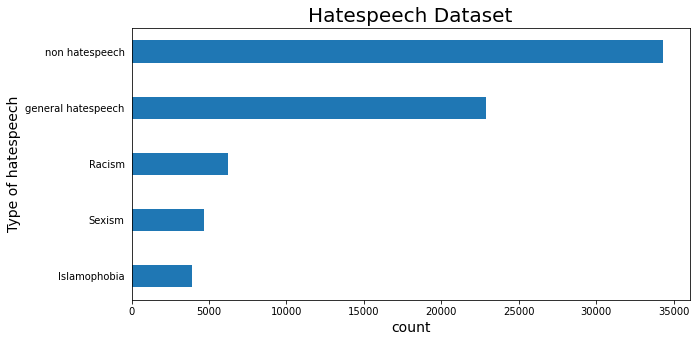

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(10,5))
#axl = fig.add_subplot(121)
plt.xlabel('count',fontsize=14)
plt.ylabel('Type of hatespeech',fontsize=14)
plt.title("Hatespeech Dataset",fontsize=20)
plt.barh(['Islamophobia','Sexism','Racism','general hatespeech','non hatespeech'],[isl.count(),sexist.count(),racist.count(),general_hate.count(),non_hate.count()],height=0.4)
plt.tick_params(left=False)
plt.show()
fig.savefig("barplot.png")

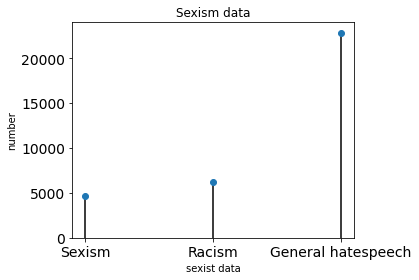

In [13]:
fig = plt.figure(figsize=(10,4))
axl = fig.add_subplot(121)
axl.set_xlabel('sexist data')
axl.set_ylabel('number')
axl.set_title("Sexism data")
plt.vlines(x = ['Sexism','Racism','General hatespeech'],ymin=0,ymax=[sexist.count(),racist.count(),general_hate.count()])
plt.plot(['Sexism','Racism','General hatespeech'],[sexist.count(),racist.count(),general_hate.count()],'o')
# plt.tick_params(left=False)
# sns.despine(left=False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, None)
fig.tight_layout()
plt.show()
fig.savefig('vline.png')

In [ ]:
# train_loss = [0.9285555555555556, 0.9651666666666666, 0.9810555555555556]
# val_loss = [0.942,  0.953, 0.9573333333333334]


# fig = plt.figure(figsize=(10,5))
# #axl = fig.add_subplot(121)
# plt.xlabel('epochs',fontsize=14)
# plt.ylabel('acuuracy',fontsize=14)
# plt.title("XLNet_Model accuracy",fontsize=20)
# plt.xticks(range(1,4))
# plt.plot([1,2,3],train_loss, label='training accuracy')
# plt.plot([1,2,3],val_loss, label='validation accuracy')
# plt.tick_params(left=False)
# plt.legend()
# plt.show()
# fig.savefig("../mid_evaluation/acc.png")